# New York City - Subway, Bus, and Covid-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#CHANGE THIS CELL TO YOUR OWN CWD
import os
os.getcwd()

'/Users/Ryan/Desktop/IndEng 135'

In [3]:
transportation_df = pd.read_csv('MTA_recent_ridership_data_20211103.csv')
transportation_df.head()

,Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day,LIRR: Total Estimated Ridership,LIRR: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % Change From Pre-Pandemic Equivalent Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % Change From Pre-Pandemic Equivalent Day
0,11/3/2021,3295695,-45.3%,1357263,-42.9%,154200.0,-46%,131000.0,-49%,23349,-29.9%,901230,-3.7%
1,11/2/2021,2850855,-48.5%,1196035,-43.2%,147800.0,-49%,129300.0,-50%,22016,-27.8%,853432,-4.3%
2,11/1/2021,3036895,-47.9%,1422789,-38.5%,158400.0,-46%,131300.0,-51%,21387,-29.0%,898451,-2.2%
3,10/31/2021,1746903,-39.3%,652705,-34.2%,68700.0,-27%,66300.0,-18%,12233,-27.6%,824978,6.2%
4,10/30/2021,2044506,-39.0%,818129,-41.0%,76500.0,-32%,69300.0,-28%,12642,-30.6%,854656,-7.7%


In [4]:
covid_df = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')
covid_df.head()

,DATE_OF_INTEREST,CASE_COUNT,probable_case_count,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,all_case_count_7day_avg,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,si_probable_case_count,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,si_probable_death_count,SI_CASE_COUNT_7DAY_AVG,si_all_case_count_7day_avg,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,si_all_death_count_7day_avg,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
covid_date_and_count = covid_df.iloc[1:, 0:2].reset_index().drop(columns = 'index')
covid_date_and_count.head()

,DATE_OF_INTEREST,CASE_COUNT
0,03/01/2020,0
1,03/02/2020,0
2,03/03/2020,1
3,03/04/2020,5
4,03/05/2020,3


In [6]:
bus_date_and_ridership = transportation_df.iloc[2:, 0:5].rename(columns = 
                                                  {transportation_df.columns[0]:'Date'})
bus_date_and_ridership = bus_date_and_ridership.iloc[::-1].reset_index().drop(columns = ['index',
                                                                                        'Subways: Total Estimated Ridership',
                                                                                        'Subways: % Change From Pre-Pandemic Equivalent Day'])


subway_date_and_ridership = transportation_df.iloc[2:, 0:3].rename(columns = 
                                                                  {transportation_df.columns[0]:'Date'})
subway_date_and_ridership = subway_date_and_ridership.iloc[::-1].reset_index().drop(columns = ['index'])
subway_date_and_ridership

,Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day
0,3/1/2020,2214601,-1.3%
1,3/2/2020,5347055,23.9%
2,3/3/2020,5498556,-3.9%
3,3/4/2020,5515945,-3.2%
4,3/5/2020,5513656,-4.4%
...,...,...,...
606,10/28/2021,3373340,-41.6%
607,10/29/2021,3256208,-45.3%
608,10/30/2021,2044506,-39.0%
609,10/31/2021,1746903,-39.3%


In [7]:
bus_date_and_ridership.insert(3, 'Date of Interest', covid_date_and_count['DATE_OF_INTEREST'])
bus_date_and_ridership.insert(4, 'Number of COVID-19 Cases', covid_date_and_count['CASE_COUNT'])

In [8]:
subway_date_and_ridership.insert(3, 'Number of COVID-19 Cases', covid_date_and_count['CASE_COUNT'])

In [9]:
subway_date_and_ridership.head()

,Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day,Number of COVID-19 Cases
0,3/1/2020,2214601,-1.3%,0
1,3/2/2020,5347055,23.9%,0
2,3/3/2020,5498556,-3.9%,1
3,3/4/2020,5515945,-3.2%,5
4,3/5/2020,5513656,-4.4%,3


In [10]:
#changing the % change column to numeric data so it's easier to work with
bus_and_covid_unclean = bus_date_and_ridership[['Date', 'Buses: Total Estimated Ridership',
                                                'Buses: % Change From Pre-Pandemic Equivalent Day',
                                                'Number of COVID-19 Cases']]
bus_and_covid_unclean['Buses: % Change From Pre-Pandemic Equivalent Day - Numeric'] = (
    pd.to_numeric(bus_and_covid_unclean['Buses: % Change From Pre-Pandemic Equivalent Day'].str[:-1]))

subway_date_and_ridership['Subways: % Change From Pre-Pandemic Equivalent Day - Numeric'] = (
    pd.to_numeric(subway_date_and_ridership['Subways: % Change From Pre-Pandemic Equivalent Day'].str[:-1]))

#fixing date column
bus_and_covid_unclean["New Date"] = pd.to_datetime(bus_and_covid_unclean['Date'])
subway_date_and_ridership["New Date"] = pd.to_datetime(subway_date_and_ridership['Date'])

bus_and_covid_unclean_2 = (bus_and_covid_unclean[['New Date', 'Buses: Total Estimated Ridership',
                                        'Buses: % Change From Pre-Pandemic Equivalent Day - Numeric',
                                        'Number of COVID-19 Cases']])
subway_and_covid_unclean = subway_date_and_ridership[['New Date', 'Subways: Total Estimated Ridership',
                                            'Subways: % Change From Pre-Pandemic Equivalent Day - Numeric',
                                            'Number of COVID-19 Cases']]

bus_and_covid_unclean_2

,New Date,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day - Numeric,Number of COVID-19 Cases
0,2020-03-01,984900,1.0,0
1,2020-03-02,2209100,40.0,0
2,2020-03-03,2228600,-3.0,1
3,2020-03-04,2177200,-3.0,5
4,2020-03-05,2244500,-1.0,3
...,...,...,...,...
606,2021-10-28,1511792,-30.4,693
607,2021-10-29,1422457,-37.2,618
608,2021-10-30,818129,-41.0,376
609,2021-10-31,652705,-34.2,435


In [11]:
#creating new columns for ridership in 2019 (pre-pandemic)
bus_and_covid = bus_and_covid_unclean_2
subway_and_covid = subway_and_covid_unclean

pd.options.mode.chained_assignment = None
bus_ridership = np.array(bus_and_covid['Buses: Total Estimated Ridership'])
bus_percent_change = np.array(bus_and_covid['Buses: % Change From Pre-Pandemic Equivalent Day - Numeric'])
old_bus_ridership = bus_ridership / (1 + bus_percent_change/100)

subway_ridership = np.array(subway_and_covid['Subways: Total Estimated Ridership'])
subway_percent_change = np.array(subway_and_covid['Subways: % Change From Pre-Pandemic Equivalent Day - Numeric'])
old_subway_ridership = subway_ridership / (1 + subway_percent_change/100)


bus_and_covid['Equivalent Ridership from Previous Year'] = np.round(old_bus_ridership)
subway_and_covid['Equivalent Ridership from Previous Year'] = np.round(old_subway_ridership)

In [12]:
subway_and_covid

,New Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day - Numeric,Number of COVID-19 Cases,Equivalent Ridership from Previous Year
0,2020-03-01,2214601,-1.3,0,2243770.0
1,2020-03-02,5347055,23.9,0,4315621.0
2,2020-03-03,5498556,-3.9,1,5721702.0
3,2020-03-04,5515945,-3.2,5,5698290.0
4,2020-03-05,5513656,-4.4,3,5767423.0
...,...,...,...,...,...
606,2021-10-28,3373340,-41.6,693,5776267.0
607,2021-10-29,3256208,-45.3,618,5952848.0
608,2021-10-30,2044506,-39.0,376,3351649.0
609,2021-10-31,1746903,-39.3,435,2877929.0


In [13]:
bus_and_covid

,New Date,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day - Numeric,Number of COVID-19 Cases,Equivalent Ridership from Previous Year
0,2020-03-01,984900,1.0,0,975149.0
1,2020-03-02,2209100,40.0,0,1577929.0
2,2020-03-03,2228600,-3.0,1,2297526.0
3,2020-03-04,2177200,-3.0,5,2244536.0
4,2020-03-05,2244500,-1.0,3,2267172.0
...,...,...,...,...,...
606,2021-10-28,1511792,-30.4,693,2172115.0
607,2021-10-29,1422457,-37.2,618,2265059.0
608,2021-10-30,818129,-41.0,376,1386659.0
609,2021-10-31,652705,-34.2,435,991953.0


## Bus Graphs

Text(0.5, 1.0, 'NYC Bus Ridership During the Pandemic')

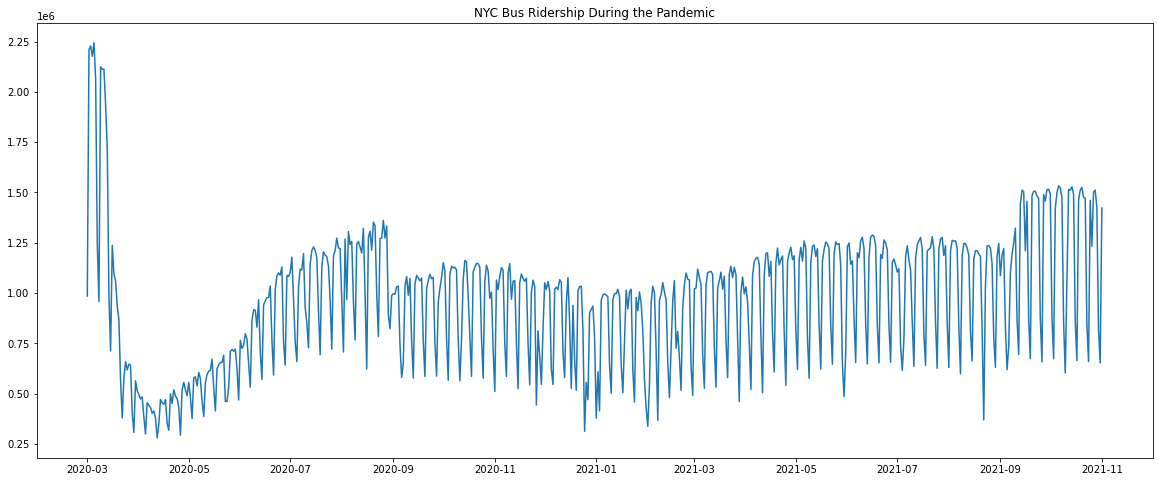

In [14]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Buses: Total Estimated Ridership', data = bus_and_covid)

plt.title('NYC Bus Ridership During the Pandemic')

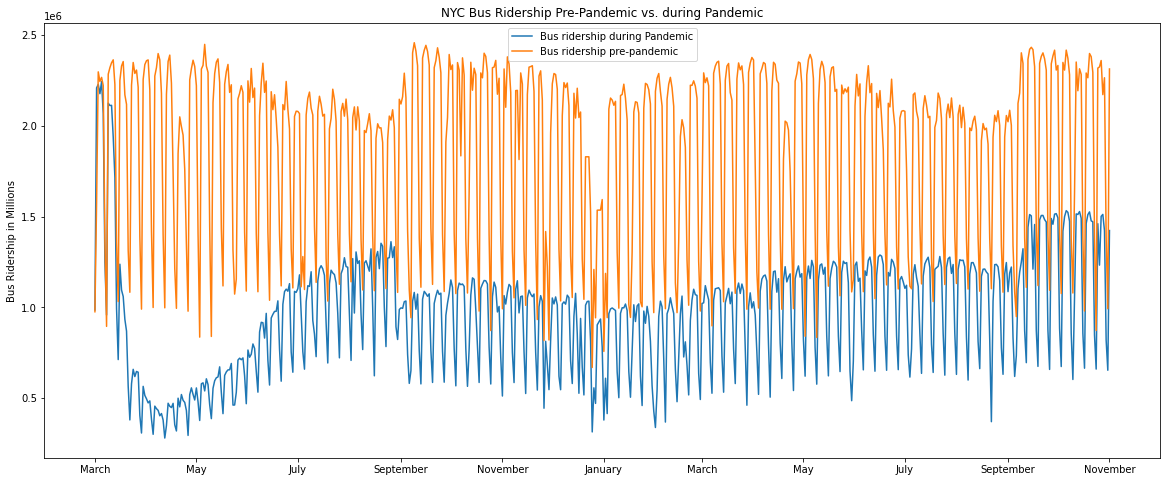

In [15]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Buses: Total Estimated Ridership', data = bus_and_covid)
plt.plot('New Date', 'Equivalent Ridership from Previous Year', data =  bus_and_covid)

dates = pd.to_datetime(['3/1/2020', '5/1/2020', '7/1/2020', '9/1/2020', '11/1/2020',
        '1/1/2021', '3/1/2021', '5/1/2021', '7/1/2021', '9/1/2021', '11/1/2021'])
values = ['March', 'May', 'July', 'September', 'November', 
          'January', 'March', 'May', 'July', 'September', 'November']
plt.xticks(dates, values)
plt.title('NYC Bus Ridership Pre-Pandemic vs. during Pandemic')
plt.ylabel('Bus Ridership in Millions')
plt.legend(['Bus ridership during Pandemic', 'Bus ridership pre-pandemic'])

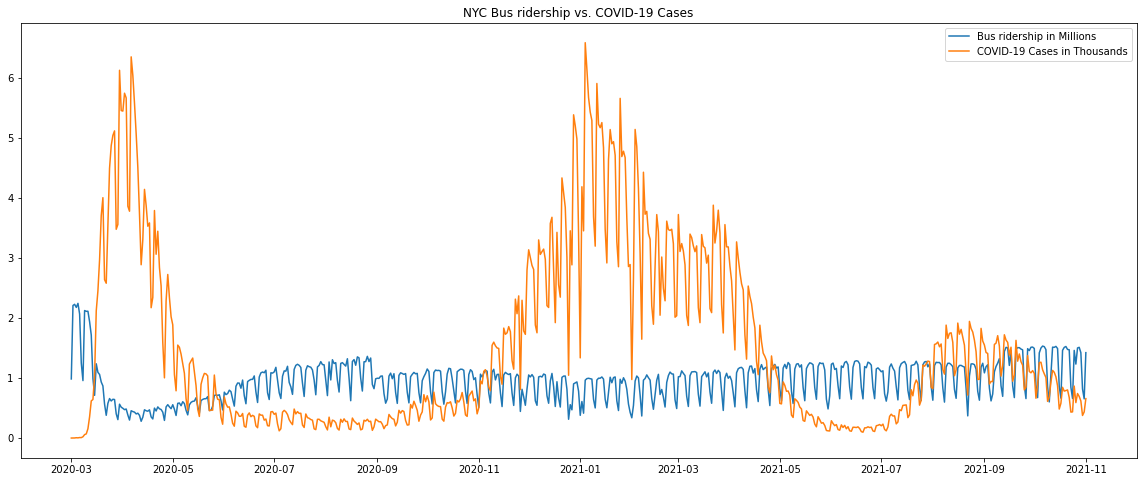

In [16]:
plt.figure(figsize=(20, 8))
plt.plot(bus_and_covid['New Date'], bus_and_covid['Buses: Total Estimated Ridership']/1000000)
plt.plot(bus_and_covid['New Date'], bus_and_covid['Number of COVID-19 Cases']/1000)

plt.title('NYC Bus ridership vs. COVID-19 Cases')
plt.legend(['Bus ridership in Millions', 'COVID-19 Cases in Thousands'])

## Subway Graphs

Text(0.5, 1.0, 'NYC Subway Ridership During the Pandemic')

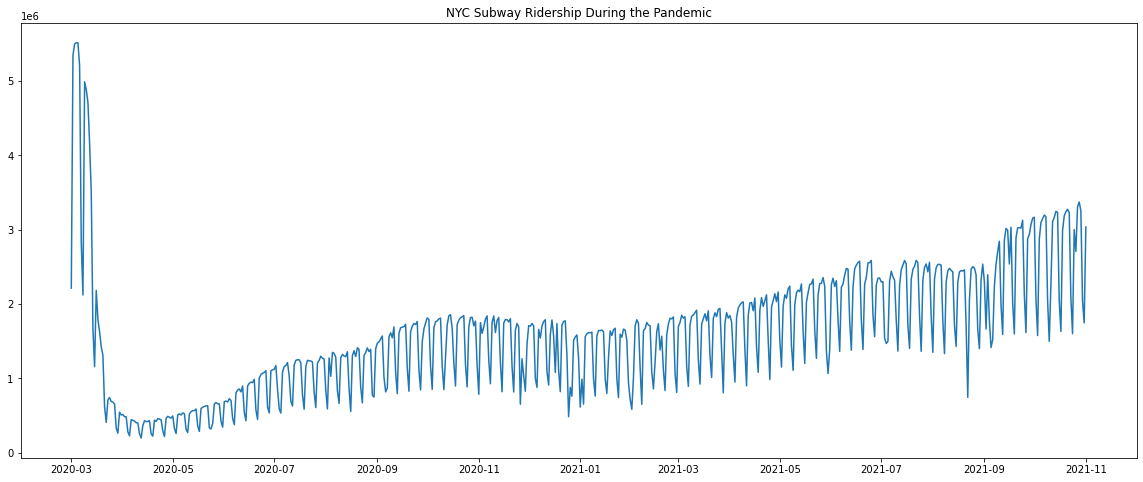

In [17]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Subways: Total Estimated Ridership', data = subway_and_covid)

plt.title('NYC Subway Ridership During the Pandemic')

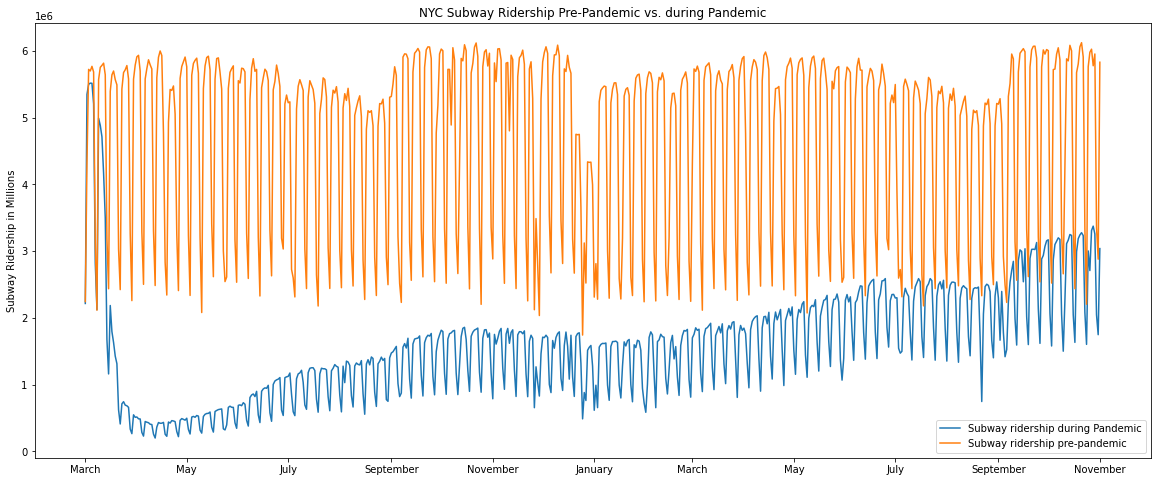

In [18]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Subways: Total Estimated Ridership', data = subway_and_covid)
plt.plot('New Date', 'Equivalent Ridership from Previous Year', data =  subway_and_covid)

dates = pd.to_datetime(['3/1/2020', '5/1/2020', '7/1/2020', '9/1/2020', '11/1/2020',
        '1/1/2021', '3/1/2021', '5/1/2021', '7/1/2021', '9/1/2021', '11/1/2021'])
values = ['March', 'May', 'July', 'September', 'November', 
          'January', 'March', 'May', 'July', 'September', 'November']
plt.xticks(dates, values)

plt.title('NYC Subway Ridership Pre-Pandemic vs. during Pandemic')
plt.ylabel('Subway Ridership in Millions')
plt.legend(['Subway ridership during Pandemic', 'Subway ridership pre-pandemic'])

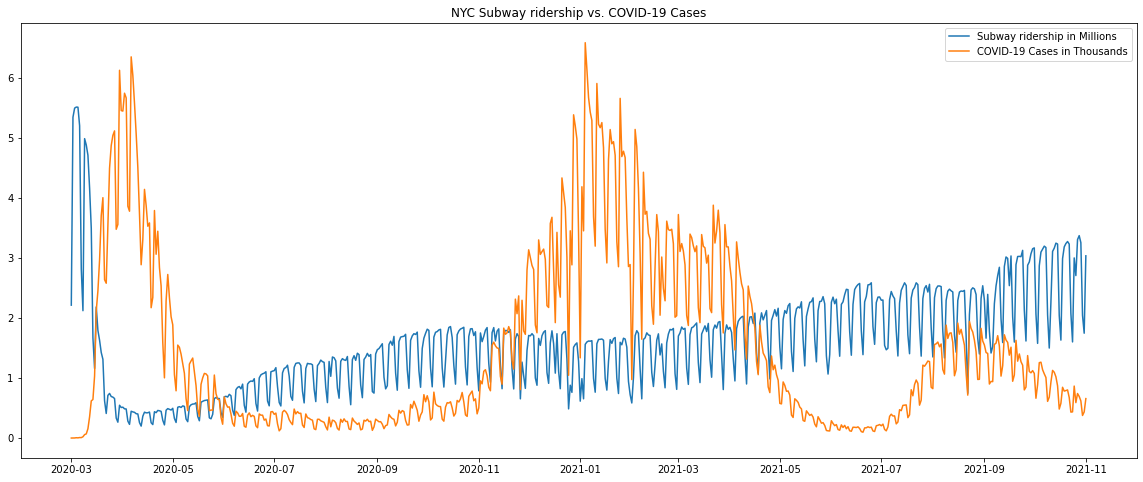

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(subway_and_covid['New Date'], subway_and_covid['Subways: Total Estimated Ridership']/1000000)
plt.plot(subway_and_covid['New Date'], subway_and_covid['Number of COVID-19 Cases']/1000)

plt.title('NYC Subway ridership vs. COVID-19 Cases')
plt.legend(['Subway ridership in Millions', 'COVID-19 Cases in Thousands'])

## Comparing Bus and Subway riderships

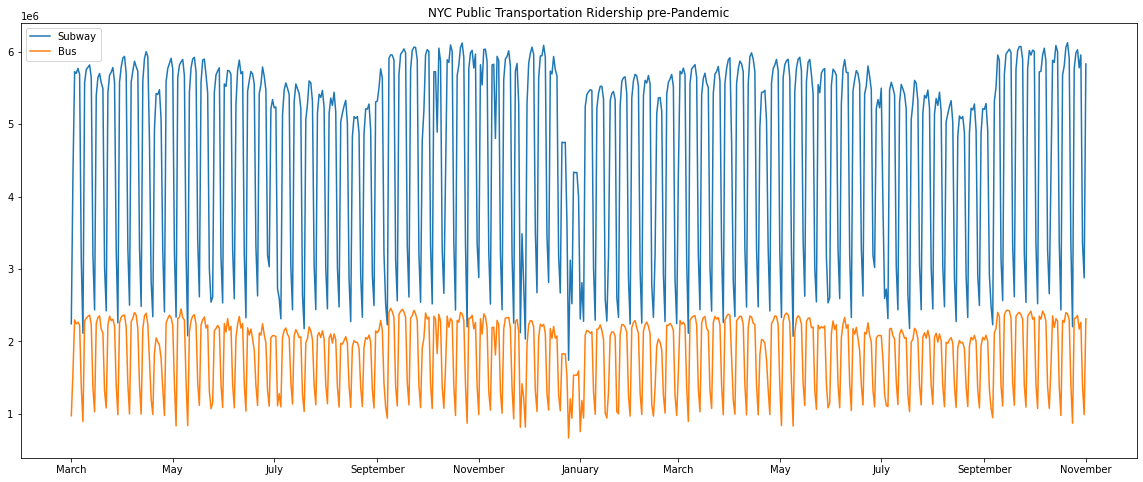

In [20]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Equivalent Ridership from Previous Year', data =  subway_and_covid)
plt.plot('New Date', 'Equivalent Ridership from Previous Year', data =  bus_and_covid)


dates = pd.to_datetime(['3/1/2020', '5/1/2020', '7/1/2020', '9/1/2020', '11/1/2020',
        '1/1/2021', '3/1/2021', '5/1/2021', '7/1/2021', '9/1/2021', '11/1/2021'])
values = ['March', 'May', 'July', 'September', 'November', 
          'January', 'March', 'May', 'July', 'September', 'November']
plt.xticks(dates, values)
plt.title('NYC Public Transportation Ridership pre-Pandemic')
plt.legend(['Subway', 'Bus'])

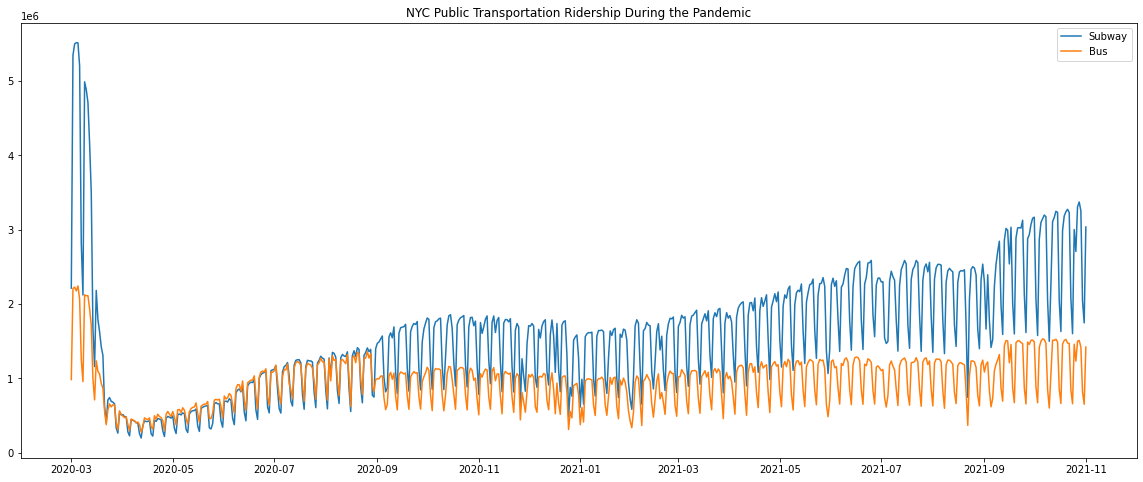

In [21]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Subways: Total Estimated Ridership', data = subway_and_covid)
plt.plot('New Date', 'Buses: Total Estimated Ridership', data = bus_and_covid)

plt.title('NYC Public Transportation Ridership During the Pandemic')
plt.legend(['Subway', 'Bus'])

## Forecasting

In [22]:
bus_and_covid

,New Date,Buses: Total Estimated Ridership,Buses: % Change From Pre-Pandemic Equivalent Day - Numeric,Number of COVID-19 Cases,Equivalent Ridership from Previous Year
0,2020-03-01,984900,1.0,0,975149.0
1,2020-03-02,2209100,40.0,0,1577929.0
2,2020-03-03,2228600,-3.0,1,2297526.0
3,2020-03-04,2177200,-3.0,5,2244536.0
4,2020-03-05,2244500,-1.0,3,2267172.0
...,...,...,...,...,...
606,2021-10-28,1511792,-30.4,693,2172115.0
607,2021-10-29,1422457,-37.2,618,2265059.0
608,2021-10-30,818129,-41.0,376,1386659.0
609,2021-10-31,652705,-34.2,435,991953.0


Text(0.5, 1.0, 'NYC Bus Ridership During the Pandemic')

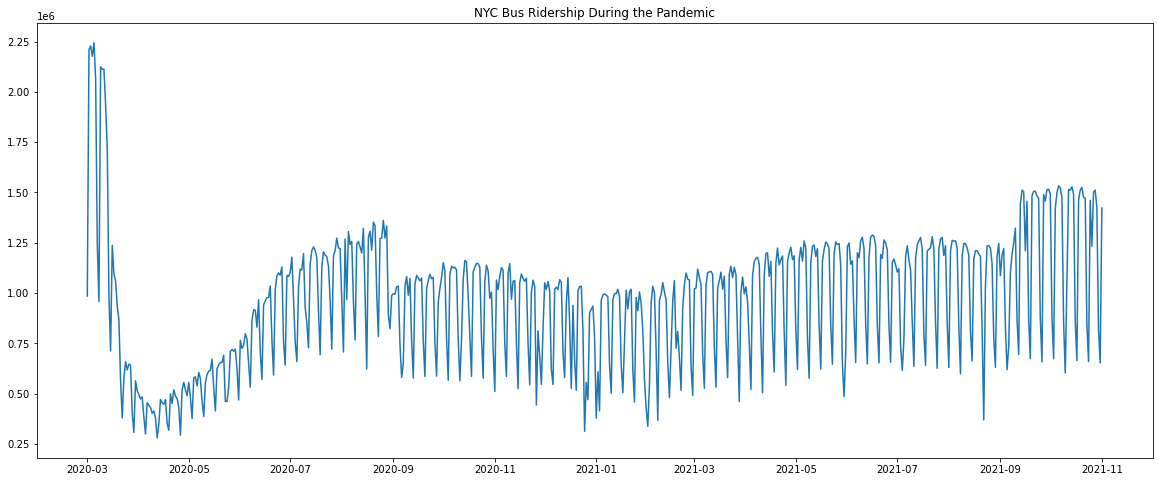

In [23]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Buses: Total Estimated Ridership', data = bus_and_covid)

plt.title('NYC Bus Ridership During the Pandemic')

/Users/Ryan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/Ryan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


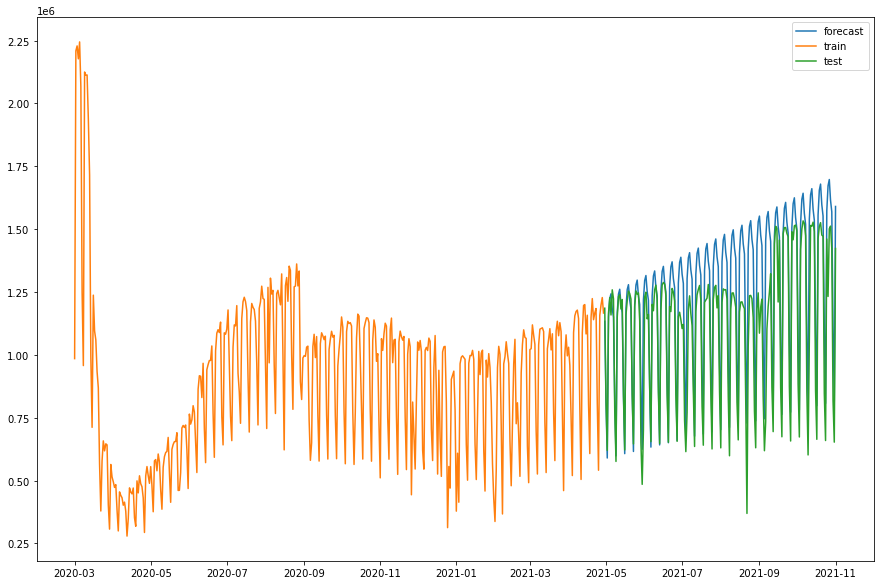

In [24]:
buses =  bus_and_covid[['New Date', "Buses: Total Estimated Ridership"]]
buses.set_index("New Date", inplace = True)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = buses.iloc[0:425, :]
test  = buses.iloc[425:, :]


model = ExponentialSmoothing(train['Buses: Total Estimated Ridership'],
                             trend = "additive",
                             seasonal = "multiplicative",
                             seasonal_periods = 7,
                             freq = "D")
fit = model.fit(optimized = True)
pred = fit.forecast(186)


plt.figure(figsize = (15,10))
plt.plot(pred, label = 'forecast')
plt.plot(train['Buses: Total Estimated Ridership'], label = 'train')
plt.plot(test['Buses: Total Estimated Ridership'], label = 'test')
plt.legend();

In [25]:
subway_and_covid

,New Date,Subways: Total Estimated Ridership,Subways: % Change From Pre-Pandemic Equivalent Day - Numeric,Number of COVID-19 Cases,Equivalent Ridership from Previous Year
0,2020-03-01,2214601,-1.3,0,2243770.0
1,2020-03-02,5347055,23.9,0,4315621.0
2,2020-03-03,5498556,-3.9,1,5721702.0
3,2020-03-04,5515945,-3.2,5,5698290.0
4,2020-03-05,5513656,-4.4,3,5767423.0
...,...,...,...,...,...
606,2021-10-28,3373340,-41.6,693,5776267.0
607,2021-10-29,3256208,-45.3,618,5952848.0
608,2021-10-30,2044506,-39.0,376,3351649.0
609,2021-10-31,1746903,-39.3,435,2877929.0


Text(0.5, 1.0, 'NYC Subway Ridership During the Pandemic')

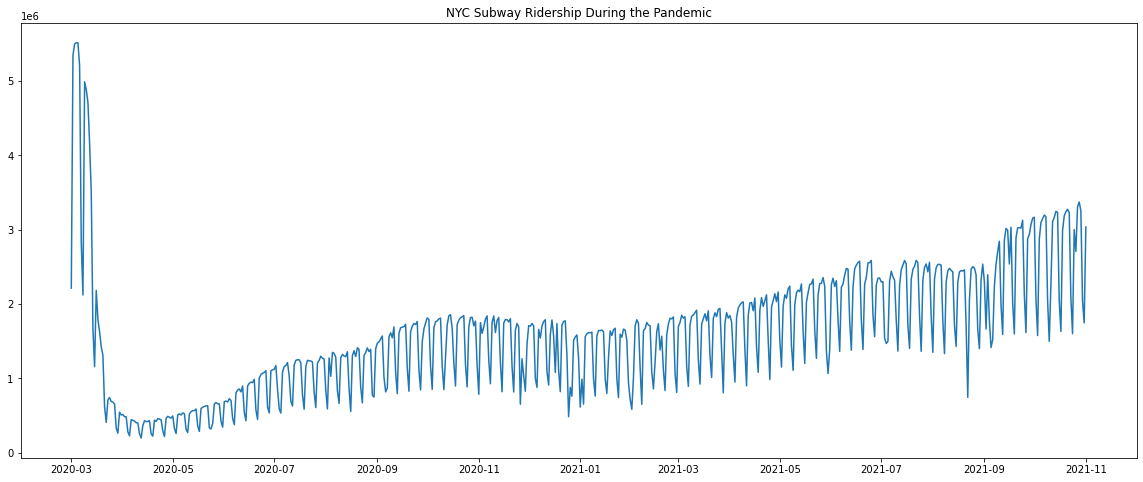

In [26]:
plt.figure(figsize=(20, 8))
plt.plot('New Date', 'Subways: Total Estimated Ridership', data = subway_and_covid)

plt.title('NYC Subway Ridership During the Pandemic')

/Users/Ryan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/Ryan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


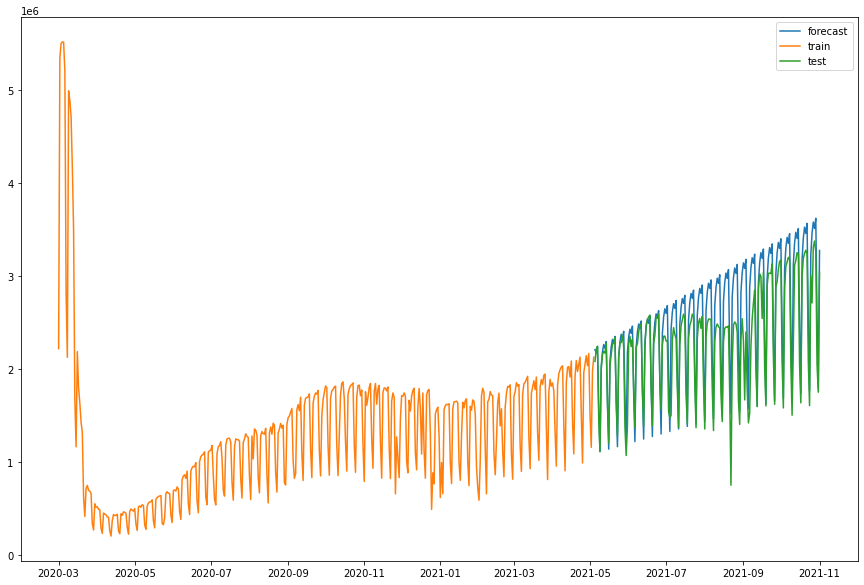

In [27]:
subways =  subway_and_covid[['New Date', "Subways: Total Estimated Ridership"]]
subways.set_index("New Date", inplace = True)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = subways.iloc[0:430, :]
test  = subways.iloc[430:, :]


model = ExponentialSmoothing(train['Subways: Total Estimated Ridership'],
                             trend = "additive",
                             seasonal = "multiplicative",
                             seasonal_periods = 7,
                             freq = "D")
fit = model.fit(optimized = True)
pred = fit.forecast(181)


plt.figure(figsize = (15,10))
plt.plot(pred, label = 'forecast')
plt.plot(train['Subways: Total Estimated Ridership'], label = 'train')
plt.plot(test['Subways: Total Estimated Ridership'], label = 'test')
plt.legend();

In [28]:
buses

,Buses: Total Estimated Ridership
New Date,
2020-03-01,984900
2020-03-02,2209100
2020-03-03,2228600
2020-03-04,2177200
2020-03-05,2244500
...,...
2021-10-28,1511792
2021-10-29,1422457
2021-10-30,818129
